In [1]:
import nltk

# POS Tagging

## Using a Tagger

In [2]:
text = nltk.word_tokenize("And now for something complete different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('complete', 'JJ'),
 ('different', 'JJ')]

In [3]:
nltk.help.upenn_tagset("RB")

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [5]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

## Similar Context

return that words that can replace with given context.

In [6]:
text.similar("woman")
#? return the word that are noun

man time day year car moment world house family child country boy
state job place way war girl work word


In [7]:
text.similar("brought")
#? return the word that are verb

made found said had put got left took told used asked set was is taken
in held given saw gave


In [8]:
text.similar("over")
#? return te word that similar to preposition

in on to of and for with from at by that into as up out down through
is all about


In [9]:
text.similar("the")

a his this their its her an that our any all one these my in your no
some other and


# Tagged Corpora

## Representing the tagged token

In [10]:
tagged_token = nltk.tag.str2tuple("fly/NN")
tagged_token

('fly', 'NN')

In [11]:
sent = '''
 The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
 other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
 Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
 said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
 accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
 interest/NN of/IN both/ABX governments/NNS ''/'' ./.
 '''


In [12]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

## Reading tag word

In [13]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [19]:
nltk.corpus.brown.tagged_words(tagset="universal")

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [32]:
nltk.help.brown_tagset("AT")

AT: article
    the an no a every th' ever' ye


In [34]:
nltk.corpus.nps_chat.tagged_words()

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [36]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

# POS Tagset

In [38]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories="news",tagset="universal")
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

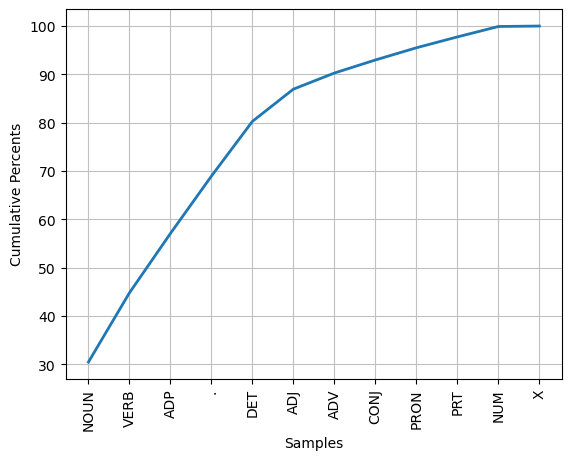

<Axes: xlabel='Samples', ylabel='Cumulative Percents'>

In [40]:
tag_fd.plot(cumulative=True,percents=True)

## Noun 

1. Noun appear after determiners and adjective.
2. It can be subject or object of the noun.


In [49]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)

In [50]:
noun_precedes = [a[1] for (a,b) in word_tag_pairs if b[1] == "NOUN"]
freq_dist = nltk.FreqDist(noun_precedes)

In [51]:
freq_dist.most_common()

[('NOUN', 7959),
 ('DET', 7373),
 ('ADJ', 4761),
 ('ADP', 3781),
 ('.', 2796),
 ('VERB', 1842),
 ('CONJ', 938),
 ('NUM', 894),
 ('ADV', 186),
 ('PRT', 94),
 ('PRON', 19),
 ('X', 11)]

## Verb

1. It describe the event and actions.
2. Verb typically express a relation involving the reference of one or more noun phrase.

In [56]:
wsj = nltk.corpus.treebank.tagged_words(tagset ="universal")
wsj

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [59]:
word_tag_wsj = nltk.FreqDist(wsj)

In [63]:
" ".join([wt[0] for (wt,_) in word_tag_wsj.most_common() if wt[1] == "VERB"][:20])

"is said was are be has have will says would were had been could 's can do say make may"

In [64]:
cfd = nltk.ConditionalFreqDist(wsj)
cfd["yield"].most_common()

[('VERB', 28), ('NOUN', 20)]

In [65]:
cfd["cut"].most_common()

[('VERB', 25), ('NOUN', 3)]

## Un-simplified tags

In [98]:
def find_tags(prefix_tag,tagged_text):
    cfd = nltk.ConditionalFreqDist(
        (tag,word)
        for (word,tag) in tagged_text
        if tag.startswith(prefix_tag)
    )
    return dict((tag,cfd[tag].most_common(5)) for tag in cfd.conditions())

In [99]:
tag_dict = find_tags("NN",nltk.corpus.brown.tagged_words(categories="news"))
for tag in sorted(tag_dict):
    print(tag,tag_dict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

'$' --> possessive
'S' --> plural
'p' --> proper nouns

'HL' --> word in the heading
'TL' --> word in the titles
'NC' --> citation

## Exploring Tagged Corpora

In [105]:
#? what are the words followed by "often"
brown_learned_text = nltk.corpus.brown.words(categories="learned")
",".join(sorted(set([b for (a,b) in nltk.bigrams(brown_learned_text)
          if a=="often"]))[2:10])

'accomplished,analytically,appear,apt,associated,assuming,became,become'

In [108]:
#? most interesting will what are tag is followed after the "often"
brown_learned_tagged = nltk.corpus.brown.tagged_words(categories="learned",tagset="universal")
tags = [b[1] for (a,b) in nltk.bigrams(brown_learned_tagged)
        if a[0] == "often"]
fd = nltk.FreqDist(tags)
fd.tabulate()

#? most frequency parts of speech following often are "Verb" 
#! Noun is never appear after the often in the corpus

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [112]:
# see <Verb> to  <Verb>
def process(sentence):
    for (w1,t1) ,(w2,t2),(w3,t3) in nltk.trigrams(sentence):
        if t1.startswith("V") and w2.lower() == "to" and t3.startswith("V"):
            return(w1,w2,w3)

In [115]:
pattern = []
for tag_sent in nltk.corpus.brown.tagged_sents():
    if a:= process(tag_sent):
        pattern.append(a)

In [116]:
pattern[:10]

[('combined', 'to', 'achieve'),
 ('continue', 'to', 'place'),
 ('serve', 'to', 'protect'),
 ('wanted', 'to', 'wait'),
 ('allowed', 'to', 'place'),
 ('expected', 'to', 'become'),
 ('expected', 'to', 'approve'),
 ('expected', 'to', 'make'),
 ('intends', 'to', 'make'),
 ('seek', 'to', 'set')]

In [121]:
# highly ambiguous part of speech
brown_news_tagged = nltk.corpus.brown.tagged_words(categories="news",tagset="universal")
cfd = nltk.ConditionalFreqDist(
    (word.lower(),tag)
    for (word,tag) in brown_news_tagged
)

In [119]:
cfd["best"]

FreqDist({'ADJ': 28, 'ADV': 1, 'VERB': 1, 'NOUN': 1})

In [124]:
for word in sorted(cfd.conditions()):
    if len(a:=cfd[word]) > 3:
        tags = [tag for (tag,_) in a.most_common()]
        print(word , " ".join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


# Automating Tagging

In [127]:
import nltk

In [128]:
brown_tagged_sent = nltk.corpus.brown.tagged_sents(categories="news")
brown_sent = nltk.corpus.brown.sents(categories="news")

## Default Tagger

Simply assign same tag for all the word it will act as the baseline performance.

In [130]:
tags = [tag for (_,tag) in nltk.corpus.brown.tagged_words(categories="news")]
fd = nltk.FreqDist(tags)
fd.max()

'NN'

In [131]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger("NN")
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [133]:
default_tagger.accuracy(brown_tagged_sent)

0.13089484257215028

## Regular Expression Tagger

In [134]:
patterns = [
     (r'.*ing$', 'VBG'),                # gerunds
     (r'.*ed$', 'VBD'),                 # simple past
     (r'.*es$', 'VBZ'),                 # 3rd singular present
     (r'.*ould$', 'MD'),                # modals
     (r'.*\'s$', 'NN$'),                # possessive nouns
     (r'.*s$', 'NNS'),                  # plural nouns
     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                      # nouns (default)
 ]

In [135]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [136]:
regexp_tagger.tag(brown_sent[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [137]:
regexp_tagger.accuracy(brown_tagged_sent)

0.20186168625812995

## Lookup tagger

In [138]:
fd = nltk.FreqDist(nltk.corpus.brown.words(categories="news"))
most_freq_words = fd.most_common(100)
#? taking 100 freq word in the corpus

In [140]:
cfd = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(categories="news"))
likely_tags = {word:cfd[word].max() 
               for (word,_) in most_freq_words}
#? tagging most freq words based on the freq of tag

In [141]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.accuracy(brown_tagged_sent)

0.45578495136941344

In [142]:
baseline_tagger.tag(brown_sent[3])
#? assign none for the word that not seen in the dict

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [143]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger("NN"))

In [144]:
baseline_tagger.accuracy(brown_tagged_sent)

0.5817769556656125

# N-Gram tagging

In [145]:
from nltk.corpus import brown

In [146]:
brown_tagged_sent = brown.tagged_sents(categories="news")
brown_sent = brown.sents(categories="news")

In [148]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sent)
unigram_tagger.accuracy(brown_tagged_sent)

0.9349006503968017

## Separating the training and testing data

In [149]:
size = int(len(brown_tagged_sent)*0.9)
train_sents = brown_tagged_sent[:size]
test_sents = brown_tagged_sent[size:]

In [150]:
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

0.8121200039868434

## General n-gram tagger

In [151]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sent[4203])

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

here most the tag is none ,this is due to sparse data issue.

In [152]:
bigram_tagger.accuracy(test_sents)

0.10206319146815508

## Combining Taggers

In [153]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_sents,backoff=t0)
t2 = nltk.BigramTagger(train_sents,backoff=t1)
t2.accuracy(test_sents)

0.8452108043456593